In [41]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [42]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:], gray=True)

In [43]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.44)

In [44]:
lmbda = 8e-1
opt = tvl1.TVL1Deconv.Options({'Verbose': True, 'MaxMainIter': 200,
                               'RelStopTol': 5e-3, 'gEvalY': False,
                               'AutoRho': {'Enabled': True}})

In [45]:
b = tvl1.TVL1Deconv(np.ones((1,1)), imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------
   0  1.00e+05  6.90e+04  3.91e+04  4.54e-01  3.61e-01  1.70e+00
   1  7.75e+04  6.40e+04  1.68e+04  3.26e-01  4.00e-01  1.70e+00
   2  1.30e+05  1.05e+05  3.19e+04  3.37e-01  4.92e-01  1.54e+00
   3  8.81e+04  7.13e+04  2.10e+04  3.02e-01  3.30e-01  1.27e+00
   4  8.89e+04  6.83e+04  2.56e+04  2.76e-01  2.97e-01  1.27e+00
   5  9.23e+04  7.66e+04  1.95e+04  2.28e-01  2.11e-01  1.27e+00
   6  9.39e+04  8.03e+04  1.71e+04  2.04e-01  2.03e-01  1.27e+00
   7  8.10e+04  6.99e+04  1.40e+04  1.69e-01  1.61e-01  1.27e+00
   8  7.83e+04  6.73e+04  1.37e+04  1.50e-01  1.50e-01  1.27e+00
   9  8.00e+04  7.07e+04  1.17e+04  1.27e-01  1.11e-01  1.27e+00
  10  8.02e+04  7.15e+04  1.08e+04  1.12e-01  9.97e-02  1.27e+00
  11  7.54e+04  6.80e+04  9.25e+03  9.43e-02  8.30e-02  1.27e+00
  12  7.39e+04  6.70e+04  8.65e+03  8.22e-02  7.63e-02  1.27e+00
  13  7.46e+04  6.82e+04 

In [46]:
print("TVL1Deconv solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Deconv solve time: 150.79 s
Noisy image PSNR:     6.35 dB
Denoised image PSNR: 30.94 dB


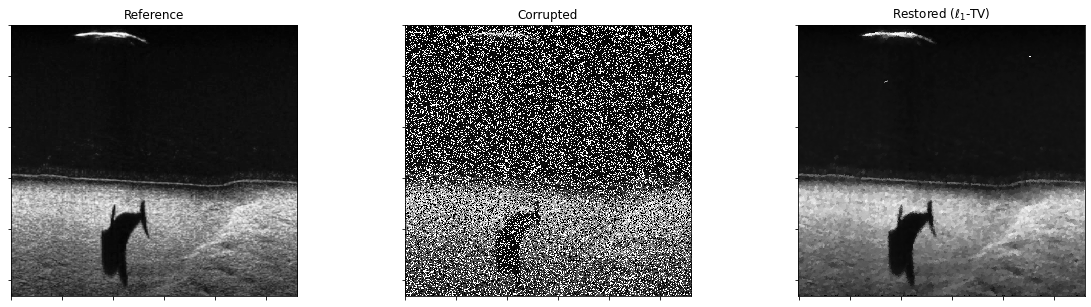

In [47]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

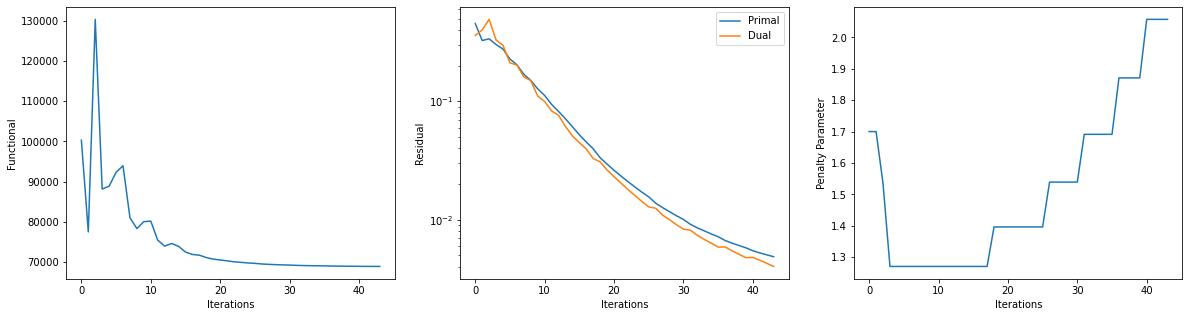

In [48]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()


In [49]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.8747766540252979
